## Data cleaning

Datasets
* [Average wages](https://data.oecd.org/earnwage/average-wages.htm)
* [Hours worked](https://data.oecd.org/emp/hours-worked.htm)
* [Working hours needed to exit poverty](https://data.oecd.org/benwage/working-hours-needed-to-exit-poverty.htm)
* [GDP per hour worked](https://data.oecd.org/lprdty/gdp-per-hour-worked.htm)
* [Labour productivity and utilisation](https://data.oecd.org/lprdty/labour-productivity-and-utilisation.htm#indicator-chart)
* [ Employee compensation by activity](https://data.oecd.org/earnwage/employee-compensation-by-activity.htm#indicator-chart)
* [# Employment rate](https://data.oecd.org/emp/employment-rate.htm)
* [# Inégalité de revenu](https://data.oecd.org/fr/inequality/inegalite-de-revenu.htm)
* [# Poverty rate](https://data.oecd.org/inequality/poverty-rate.htm)

In [33]:
import pandas as pd
import numpy as np

In [34]:
avg_wg = pd.read_csv('average_wages.csv')
hrs_wk = pd.read_csv('hours_worked.csv')
hrs_pvty = pd.read_csv('workHours_exitPoverty.csv')
GDPhrs_wk = pd.read_csv('GDPhoursWorked.csv')
GDPcapContr = pd.read_csv('GDPCAPCONTR.csv')
wg_actvy = pd.read_csv('COMPEMPLOYEEACTY.csv')
income_ineq = pd.read_csv('INCOMEINEQ.csv')
poverty = pd.read_csv('POVERTY.csv')
emp_rate = pd.read_csv('EMP_rate.csv')
data = [avg_wg,hrs_wk,hrs_pvty,GDPhrs_wk, GDPcapContr,wg_actvy,income_ineq,poverty, emp_rate]

# for element in data:
#     print(element.head(1))

Information about the data's Flag codes : 
Break in series
* e = Estimated value
* f = Forecast value
* x = Not applicable
* p = Provisional data
* s = Strike
* \- = Nil

In [35]:
#liste des pays par dataset: si un pays est mentionné 3 fois dans la colonne 'LOCATION', ça le réunit en une seule fois
countries_avg_wg = avg_wg['LOCATION'].unique()
countries_hrs_wk = hrs_wk['LOCATION'].unique()
countries_hrs_pvty = hrs_pvty['LOCATION'].unique()
countries_GDPhrs_wk = GDPhrs_wk['LOCATION'].unique()
countries_GDPcapContr = GDPcapContr['LOCATION'].unique()
countries_income_ineq = income_ineq['LOCATION'].unique()
countries_poverty = poverty['LOCATION'].unique()
countries_emp_rate = emp_rate['LOCATION'].unique()

#réunions de tous les pays de tous les datasets
countries = np.concatenate((countries_avg_wg,countries_hrs_wk,countries_hrs_pvty,countries_GDPhrs_wk,countries_GDPcapContr,countries_income_ineq,countries_poverty,countries_emp_rate), axis=0)
# [countries_avg_wg,countries_hrs_wk,countries_hrs_pvty,countries_GDPhrs_wk,countries_GDPcapContr,countries_income_ineq,countries_poverty,countries_emp_rate]
EU = ['FRA', ]
#.unique() sur la liste des pays dans tous les datasets confondus
print('The number of unique countries', np.unique(countries))

The number of unique countries ['AUS' 'AUT' 'BEL' 'BGR' 'BRA' 'CAN' 'CHE' 'CHL' 'CHN' 'COL' 'CRI' 'CYP'
 'CZE' 'DEU' 'DNK' 'EA19' 'ESP' 'EST' 'EU27' 'EU27_2020' 'EU28' 'FIN'
 'FRA' 'G-7' 'GBR' 'GRC' 'HRV' 'HUN' 'IDN' 'IND' 'IRL' 'ISL' 'ISR' 'ITA'
 'JPN' 'KOR' 'LTU' 'LUX' 'LVA' 'MEX' 'MLT' 'NLD' 'NOR' 'NZL' 'OECD' 'POL'
 'PRT' 'ROU' 'RUS' 'SVK' 'SVN' 'SWE' 'TUR' 'USA' 'ZAF']


In [36]:
#nombre de pays par dataset
check_countries = [countries_avg_wg,countries_hrs_wk,countries_hrs_pvty,countries_GDPhrs_wk,countries_GDPcapContr,countries_income_ineq,countries_poverty,countries_emp_rate]
for element in check_countries:
    print(len(element))

36
46
43
48
48
44
44
46


Oupsi, pas du tout les mêmes pays par dataset et pas le même nombre
Check if the EU countries are in all the data sets

In [37]:
print(countries_avg_wg)
#we select the countries that appear in the EU and the other countries that appear in the dataset with the less number of countires
EU = ['AUT', 'BEL', 'CZE', 'DNK', 'FIN', 'FRA', 'DEU',
       'GRC', 'HUN', 'IRL', 'ITA', 'LUX', 'NLD', 'POL', 'PRT', 'SVK', 'ESP', 'SWE','EST', 'SVN', 'LVA', 'LTU'] #no croatia, bulgaria, romania, malta, cyprus

notEU = ['AUS','CAN','KOR','MEX','NOR','CHE','GBR','USA','ISR','ISL','NZL','CHL']

for element in check_countries:
    print(np.isin(EU, element))
    print(np.isin(notEU, element))

['AUS' 'AUT' 'BEL' 'CAN' 'CZE' 'DNK' 'FIN' 'FRA' 'DEU' 'GRC' 'HUN' 'IRL'
 'ITA' 'JPN' 'KOR' 'LUX' 'MEX' 'NLD' 'NOR' 'POL' 'PRT' 'SVK' 'ESP' 'SWE'
 'CHE' 'GBR' 'USA' 'EST' 'ISR' 'SVN' 'OECD' 'ISL' 'NZL' 'CHL' 'LVA' 'LTU']
[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True]
[ True  True  True  True  True  True  True  True  True  True  True  True]
[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True]
[ True  True  True  True  True  True  True  True  True  True  True  True]
[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True]
[ True  True  True False  True  True  True  True  True  True  True  True]
[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True]
[ True  True  Tru

So MEX doesn't appear in countries_GDPhrs_wk

### Quelles sont les valeurs utiles pour chaque dataset ?

#### Attention à 
- Prendre l'année la plus avancée pour chaque donnée de chaque pays (1990,1991,1992...) -> **FAIT**
- Vérifier que les années sont toutes comparables (après 2010 idéalement ?) -> **FAIT**
- Vérifier que Subject est bien à "TOT" pour tous les dataset (population totale) -> **fait mais c'est pas le cas du coup. Vérifier ce que signifient les autres noms de codes pour la population**
- Vérifier ce que ça veut dire "flag codes" ?
- Renommer la colonne Value de chaque dataset par la donnée observée (par ex avg_wg pour average wages) sinon on va rien comprendre quand on va merge
- merge les trucs : pd.merge(df1,df2,left_index=True ou False, right_on = 'nom_de_la_colonne')**
- enlever le pays G7 !


In [38]:
print('Hours Worked', hrs_wk['TIME'].iloc[-1])
print('')
print('GDP per hour', GDPhrs_wk['TIME'].iloc[-1])
print('')
print('Average wages', avg_wg['TIME'].iloc[-1])
print('')
print('Hours poverty', hrs_pvty['TIME'].iloc[-1])
print('')
print('GDP cap contr', GDPcapContr['TIME'].iloc[-1])
print('')
print('Wages par activty', wg_actvy['TIME'].iloc[-1])
print('')
print('Income inequalities', income_ineq['TIME'].iloc[-1])
print('')
print('Poverty rate', poverty['TIME'].iloc[-1])
print('')
print('Emp rate', emp_rate['TIME'].iloc[-1])
print('')

Hours Worked 2020

GDP per hour 2020

Average wages 2020

Hours poverty 2018

GDP cap contr 2020

Wages par activty 2020

Income inequalities 2019

Poverty rate 2019

Emp rate 2021-12



In [39]:
print('Hours Worked', hrs_wk['TIME'].iloc[0])
print('')
print('GDP per hour', GDPhrs_wk['TIME'].iloc[0])
print('')
print('Average wages', avg_wg['TIME'].iloc[0])
print('')
print('Hours poverty', hrs_pvty['TIME'].iloc[0])
print('')
print('GDP cap contr', GDPcapContr['TIME'].iloc[0])
print('')
print('Wages par activty', wg_actvy['TIME'].iloc[0])
print('')
print('Income inequalities', income_ineq['TIME'].iloc[0])
print('')
print('Poverty rate', poverty['TIME'].iloc[0])
print('')
print('Emp rate', emp_rate['TIME'].iloc[0])
print('')

Hours Worked 1985

GDP per hour 1970

Average wages 1990

Hours poverty 2001

GDP cap contr 1971

Wages par activty 1995

Income inequalities 2012

Poverty rate 2012

Emp rate 1965



Go prendre jusqu'à 2018 puisque la date la plus ancienne est 2018, on peut pas aller plus loin si on veut prendre en compte les heures à travailler pour sortie de la pauvreté

In [40]:
print('Hours worked wages', hrs_wk['SUBJECT'].iloc[0])
print('')
print('GDP per hour', GDPhrs_wk['SUBJECT'].iloc[0])
print('')
print('Hours poverty', hrs_pvty['SUBJECT'].iloc[0])
print('')
print('GDP cap contr', GDPcapContr['SUBJECT'].iloc[0])
print('')
print('Wages par activty', wg_actvy['SUBJECT'].iloc[0])
print('')
print('Income inequalities', income_ineq['SUBJECT'].iloc[0])
print('')
print('Poverty rate', poverty['SUBJECT'].iloc[0])
print('')
print('Emp rate', emp_rate['SUBJECT'].iloc[0])


Hours worked wages TOT

GDP per hour TOT

Hours poverty SNGL2CHLD

GDP cap contr LPRDTY

Wages par activty SERV

Income inequalities P50P10

Poverty rate 0_17

Emp rate MEN


Oupsi. Faudrait voir ce que signifient SNGL2CHLD, LPRDTY, SERV, P50P10, 0_17 et MEN 
(bon, probablement MEN ça veut dire hommes ?)

____

## First graphs
We isolate year 2018 on each of the measures

In [ ]:
hrs_wk 
avg_wg
hrs_pvty
GDPhrs_wk
GDPcapContr
wg_actvy
income_ineq
poverty
emp_rate

In [41]:
hrs_wk.rename(columns={'Value': 'hrs_wk'}, inplace=True)
avg_wg.rename(columns={'Value': 'avg_wg'}, inplace=True)
hrs_pvty.rename(columns={'Value': 'hrs_pvty'}, inplace=True)
GDPhrs_wk.rename(columns={'Value': 'GDPhrs_wk'}, inplace=True)
GDPcapContr.rename(columns={'Value': 'GDPcapContr'}, inplace=True)
wg_actvy.rename(columns={'Value': 'wg_actvy'}, inplace=True)
income_ineq.rename(columns={'Value': 'income_ineq'}, inplace=True)
poverty.rename(columns={'Value': 'poverty'}, inplace=True)
emp_rate.rename(columns={'Value': 'emp_rate'}, inplace=True)

In [42]:
hrs_pvty

,LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,TIME,hrs_pvty,Flag Codes
0,AUS,WORKEXPOV,SNGL2CHLD,HR_67PC_AVEWAGE,A,2001,1,NaN
1,AUS,WORKEXPOV,SNGL2CHLD,HR_67PC_AVEWAGE,A,2002,2,NaN
2,AUS,WORKEXPOV,SNGL2CHLD,HR_67PC_AVEWAGE,A,2003,2,NaN
3,AUS,WORKEXPOV,SNGL2CHLD,HR_67PC_AVEWAGE,A,2004,1,NaN
4,AUS,WORKEXPOV,SNGL2CHLD,HR_67PC_AVEWAGE,A,2005,4,NaN
...,...,...,...,...,...,...,...,...
8691,RUS,WORKEXPOV,UNEMP_COUPLNOCHLD,HR_AVEWAGE,A,2018,27,NaN
8692,RUS,WORKEXPOV,SNGL2CHLD,HR_MINWAGE,A,2018,67,NaN
8693,RUS,WORKEXPOV,SNGLNOCHLD,HR_MINWAGE,A,2018,80,NaN
8694,RUS,WORKEXPOV,UNEMP_COUPL2CHLD,HR_MINWAGE,A,2018,80,NaN


In [43]:
avg_wg_2018 = avg_wg[avg_wg['TIME'] == 2018]
hrs_wk_2018 = hrs_wk[hrs_wk['TIME'] == 2018]
hrs_pvty_2018 = hrs_pvty[hrs_pvty['TIME'] == 2018]
GDPhrs_wk_2018 = GDPhrs_wk[GDPhrs_wk['TIME'] == 2018]
GDPcapContr_2018 = GDPcapContr[GDPcapContr['TIME'] == 2018]
wg_actvy_2018 = wg_actvy[wg_actvy['TIME'] == 2018]
income_ineq_2018 = income_ineq[income_ineq['TIME'] == 2018]
poverty_2018 = poverty[poverty['TIME'] == 2018]
emp_rate_2018 = emp_rate[emp_rate['TIME'] == 2018]

Again we have to make choices for a first naive analysis
for "hours to get out of poverty" => single no child has a data point for each country as well as minimum wage. We select this data 

In [44]:
hrs_pvty_2018 = hrs_pvty_2018[(hrs_pvty_2018['SUBJECT'] == 'SNGLNOCHLD') &  (hrs_pvty_2018['MEASURE'] == 'HR_67PC_AVEWAGE')]

It is not the only one. GDPhrs_wk_2018 has 2 options as well : 
* US Dollars
* 2015 = 100

We use the first option.

In [45]:
GDPhrs_wk_2018 = GDPhrs_wk_2018[GDPhrs_wk_2018['MEASURE'] == 'USD']

The GDP per capita has 2 options:
* labour productivity
* labour utilisation

We split the 2 into two dataframes

In [46]:
GDPcapContr_productivity_2018 = GDPcapContr_2018[GDPcapContr_2018['SUBJECT']=='LPRDTY']
GDPcapContr_utilisation_2018 = GDPcapContr_2018[GDPcapContr_2018['SUBJECT']=='LUTILISATION']

wg_actvy has 4 subjects : 
* agriculture
* industry
* services
* total

We only select the "total" category in a first place

In [47]:
wg_actvy_2018 =wg_actvy_2018[wg_actvy_2018['SUBJECT'] == 'TOT']

income_ineq_2018. The inequality is measured through different methods.: 
* Gini coefficient
* Interdecile P50/P10
* Interdecile P90/P10
* Interdecile P90/P50
* Palma ratio
* S80/S20 quintile share

In a first place we only select the Gini coefficient

In [48]:
income_ineq_2018 = income_ineq_2018[income_ineq_2018['SUBJECT'] == 'GINI']

4 options in the calculation of poverty index:
* Total
* 0-17 year-olds
* 18-65 year-olds
* 66 year-olds or more

we chose total

In [49]:
poverty_2018 = poverty_2018[poverty_2018['SUBJECT'] == 'TOT']

avg_wg_2018 = avg_wg_2018[avg_wg_2018[]]

In [50]:
avg_wg_2018 = avg_wg_2018[['LOCATION','avg_wg']]
hrs_wk_2018 = hrs_wk_2018[['LOCATION','hrs_wk']]
hrs_pvty_2018 = hrs_pvty_2018[['LOCATION','hrs_pvty']]
GDPhrs_wk_2018 = GDPhrs_wk_2018[['LOCATION','GDPhrs_wk']]
GDPcapContr_productivity_2018 = GDPcapContr_productivity_2018[['LOCATION','GDPcapContr']]
GDPcapContr_utilisation_2018 = GDPcapContr_utilisation_2018[['LOCATION','GDPcapContr']]
wg_actvy_2018 = wg_actvy_2018[['LOCATION','wg_actvy']]
income_ineq_2018 = income_ineq_2018[['LOCATION','income_ineq']]
poverty_2018 = poverty_2018[['LOCATION','poverty']]
emp_rate_2018 = emp_rate_2018[['LOCATION','emp_rate']]

In [51]:
avg_wg_2018_EU = avg_wg_2018[avg_wg_2018['LOCATION'].isin(EU)]
hrs_wk_2018_EU = hrs_wk_2018[hrs_wk_2018['LOCATION'].isin(EU)]
hrs_pvty_2018_EU = hrs_pvty_2018[hrs_pvty_2018['LOCATION'].isin(EU)]
GDPhrs_wk_2018_EU = GDPhrs_wk_2018[GDPhrs_wk_2018['LOCATION'].isin(EU)]
GDPcapContr_productivity_2018_EU = GDPcapContr_productivity_2018 [GDPcapContr_productivity_2018 ['LOCATION'].isin(EU)]
GDPcapContr_utilisation_2018_EU = GDPcapContr_utilisation_2018[GDPcapContr_utilisation_2018['LOCATION'].isin(EU)]
wg_actvy_2018_EU = wg_actvy_2018[wg_actvy_2018['LOCATION'].isin(EU)]
income_ineq_2018_EU = income_ineq_2018[income_ineq_2018['LOCATION'].isin(EU)]
poverty_2018_EU = poverty_2018[poverty_2018['LOCATION'].isin(EU)]


In [52]:
print(avg_wg_2018_EU['LOCATION'].unique())
print(hrs_wk_2018_EU['LOCATION'].unique())
print(hrs_pvty_2018_EU['LOCATION'].unique())
print(GDPhrs_wk_2018_EU['LOCATION'].unique())
print(GDPcapContr_productivity_2018_EU['LOCATION'].unique())

['AUT' 'BEL' 'CZE' 'DNK' 'FIN' 'FRA' 'DEU' 'GRC' 'HUN' 'IRL' 'ITA' 'LUX'
 'NLD' 'POL' 'PRT' 'SVK' 'ESP' 'SWE' 'EST' 'SVN' 'LVA' 'LTU']
['AUT' 'BEL' 'CZE' 'DNK' 'FIN' 'FRA' 'DEU' 'GRC' 'HUN' 'IRL' 'ITA' 'LUX'
 'NLD' 'POL' 'PRT' 'SVK' 'ESP' 'SWE' 'EST' 'SVN' 'LVA' 'LTU']
['AUT' 'BEL' 'CZE' 'DNK' 'FIN' 'FRA' 'DEU' 'GRC' 'HUN' 'IRL' 'ITA' 'LUX'
 'NLD' 'POL' 'PRT' 'SVK' 'ESP' 'SWE' 'EST' 'LVA' 'LTU' 'SVN']
['AUT' 'BEL' 'CZE' 'DNK' 'FIN' 'FRA' 'DEU' 'GRC' 'HUN' 'IRL' 'ITA' 'LUX'
 'NLD' 'POL' 'PRT' 'SVK' 'ESP' 'SWE' 'EST' 'SVN' 'LVA' 'LTU']
['AUT' 'BEL' 'CZE' 'DNK' 'FIN' 'FRA' 'DEU' 'GRC' 'HUN' 'IRL' 'ITA' 'LUX'
 'NLD' 'POL' 'PRT' 'SVK' 'ESP' 'SWE' 'EST' 'SVN' 'LVA' 'LTU']


In [53]:
data_2018_EU = [hrs_wk_2018_EU, hrs_pvty_2018_EU , GDPhrs_wk_2018_EU , GDPcapContr_productivity_2018_EU , GDPcapContr_utilisation_2018_EU , wg_actvy_2018_EU, income_ineq_2018_EU, poverty_2018_EU]

final = avg_wg_2018_EU
for element in data_2018_EU :
    final = pd.merge(final, element, how="right",    on='LOCATION')
final = final.drop_duplicates()

In [54]:
final

,LOCATION,avg_wg,hrs_wk,hrs_pvty,GDPhrs_wk,GDPcapContr_x,GDPcapContr_y,wg_actvy,income_ineq,poverty
0,AUT,53325.486022,1502.0,20,68.360281,0.530617,1.468707,53.750794,0.280,0.094
1,BEL,55387.695298,1580.0,16,71.700122,0.232198,1.121062,55.198516,0.258,0.082
2,CZE,29420.908126,1785.0,27,41.152718,1.371441,1.448950,49.213429,0.249,0.061
3,DNK,57794.204720,1381.0,24,73.769587,2.201011,-0.706402,59.039385,0.263,0.064
4,FIN,45770.842268,1546.0,20,61.547286,-1.143051,2.163040,53.961970,0.269,0.065
5,FRA,46866.520015,1514.0,16,67.155153,0.409723,1.032426,58.595041,0.301,0.085
6,DEU,53220.549493,1386.9,19,66.438174,0.039718,0.742410,58.356663,0.289,0.098
7,GRC,26680.286876,1965.0,16,32.410775,-3.675869,5.762689,42.349238,0.306,0.121
8,HUN,23720.568993,1729.9,22,36.720453,4.050119,1.386874,49.934744,0.280,0.087
9,IRL,48586.231015,1782.0,18,99.808717,5.264621,2.333259,30.629816,0.292,0.074


In [55]:
import seaborn as sns
import matplotlib.pyplot as plt

In [65]:
def dataframe_description(dataframe):
    print('First 5 items of the dataframe \n')
    print(dataframe.head(5))
    print('Some statistics on the dataframe \n')
    print(dataframe.describe())
    print('There are Nan values in this dataframe:', dataframe.isnull().values.any())
    for name in dataframe.keys():
            print(name, 'has', dataframe[name].isnull().sum(), 'Nan values')

    print('The dataframe has', len(dataframe[dataframe.duplicated(keep=False)]), 'duplicated values')    
    print('The correlation matrix is the following\n')
    corr_mat = dataframe.corr()
    fig, ax = plt.subplots(figsize = (6,4)) # create the figure object
    sns.heatmap(corr_mat, vmax = 1, square = True) # plot the heat-map


First 5 items of the dataframe 

  LOCATION        avg_wg  hrs_wk  hrs_pvty  GDPhrs_wk  GDPcapContr_x  \
0      AUT  53325.486022  1502.0        20  68.360281       0.530617   
1      BEL  55387.695298  1580.0        16  71.700122       0.232198   
2      CZE  29420.908126  1785.0        27  41.152718       1.371441   
3      DNK  57794.204720  1381.0        24  73.769587       2.201011   
4      FIN  45770.842268  1546.0        20  61.547286      -1.143051   

   GDPcapContr_y   wg_actvy  income_ineq  poverty  
0       1.468707  53.750794        0.280    0.094  
1       1.121062  55.198516        0.258    0.082  
2       1.448950  49.213429        0.249    0.061  
3      -0.706402  59.039385        0.263    0.064  
4       2.163040  53.961970        0.269    0.065  
Some statistics on the dataframe 

             avg_wg       hrs_wk   hrs_pvty  GDPhrs_wk  GDPcapContr_x  \
count     22.000000    22.000000  22.000000  22.000000      22.000000   
mean   40585.456352  1630.581818  22.1363

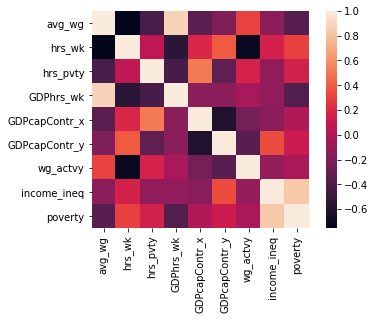

In [66]:
dataframe_description(final)

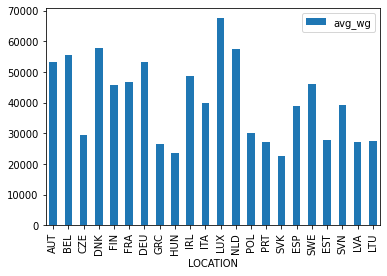

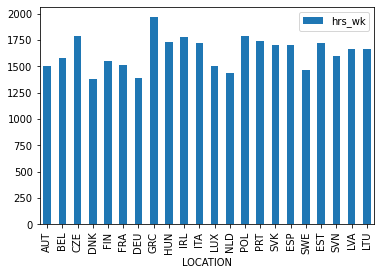

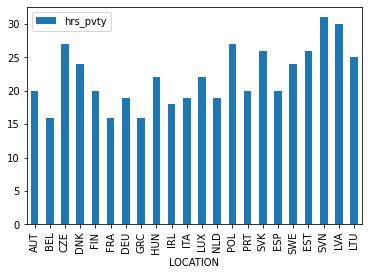

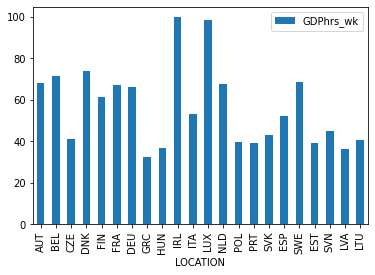

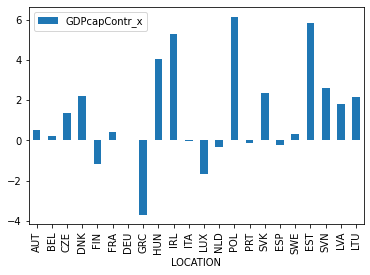

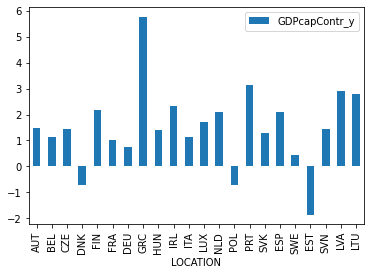

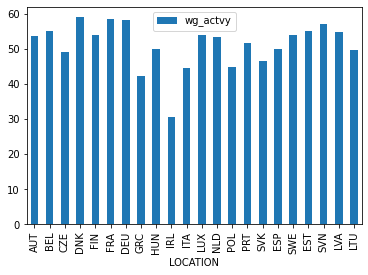

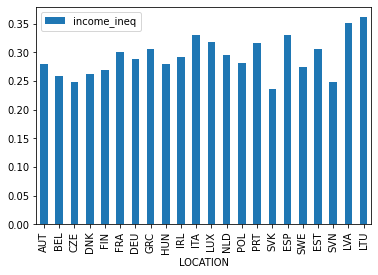

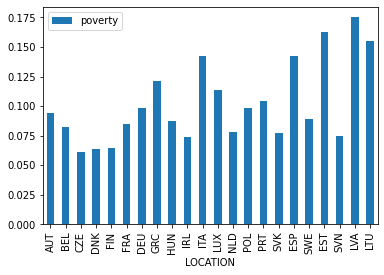

In [64]:
columns = final.columns
for element in columns[1:] :
    final.plot.bar(x = 'LOCATION', y = element)

____
